Anggota :

1. Tuti Purwaningsih (5054241002)
2. Muhammad Aditya Nugraha (5054241004)
3. Mohammad Akmal Fayyazi (5054241045)

## Import Library

In [3]:
!pip install optuna
!pip install kneed
import optuna
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn.cluster import SpectralClustering



## EDA

In [27]:
#Load data

dt=pd.read_csv('6  - Dataset_Tugas.csv', sep="\t")

dt.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
dt.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
#Check Missing Value
dt.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [28]:
#Handle Missing Value

dt['Income']=dt['Income'].fillna(dt['Income'].mean())


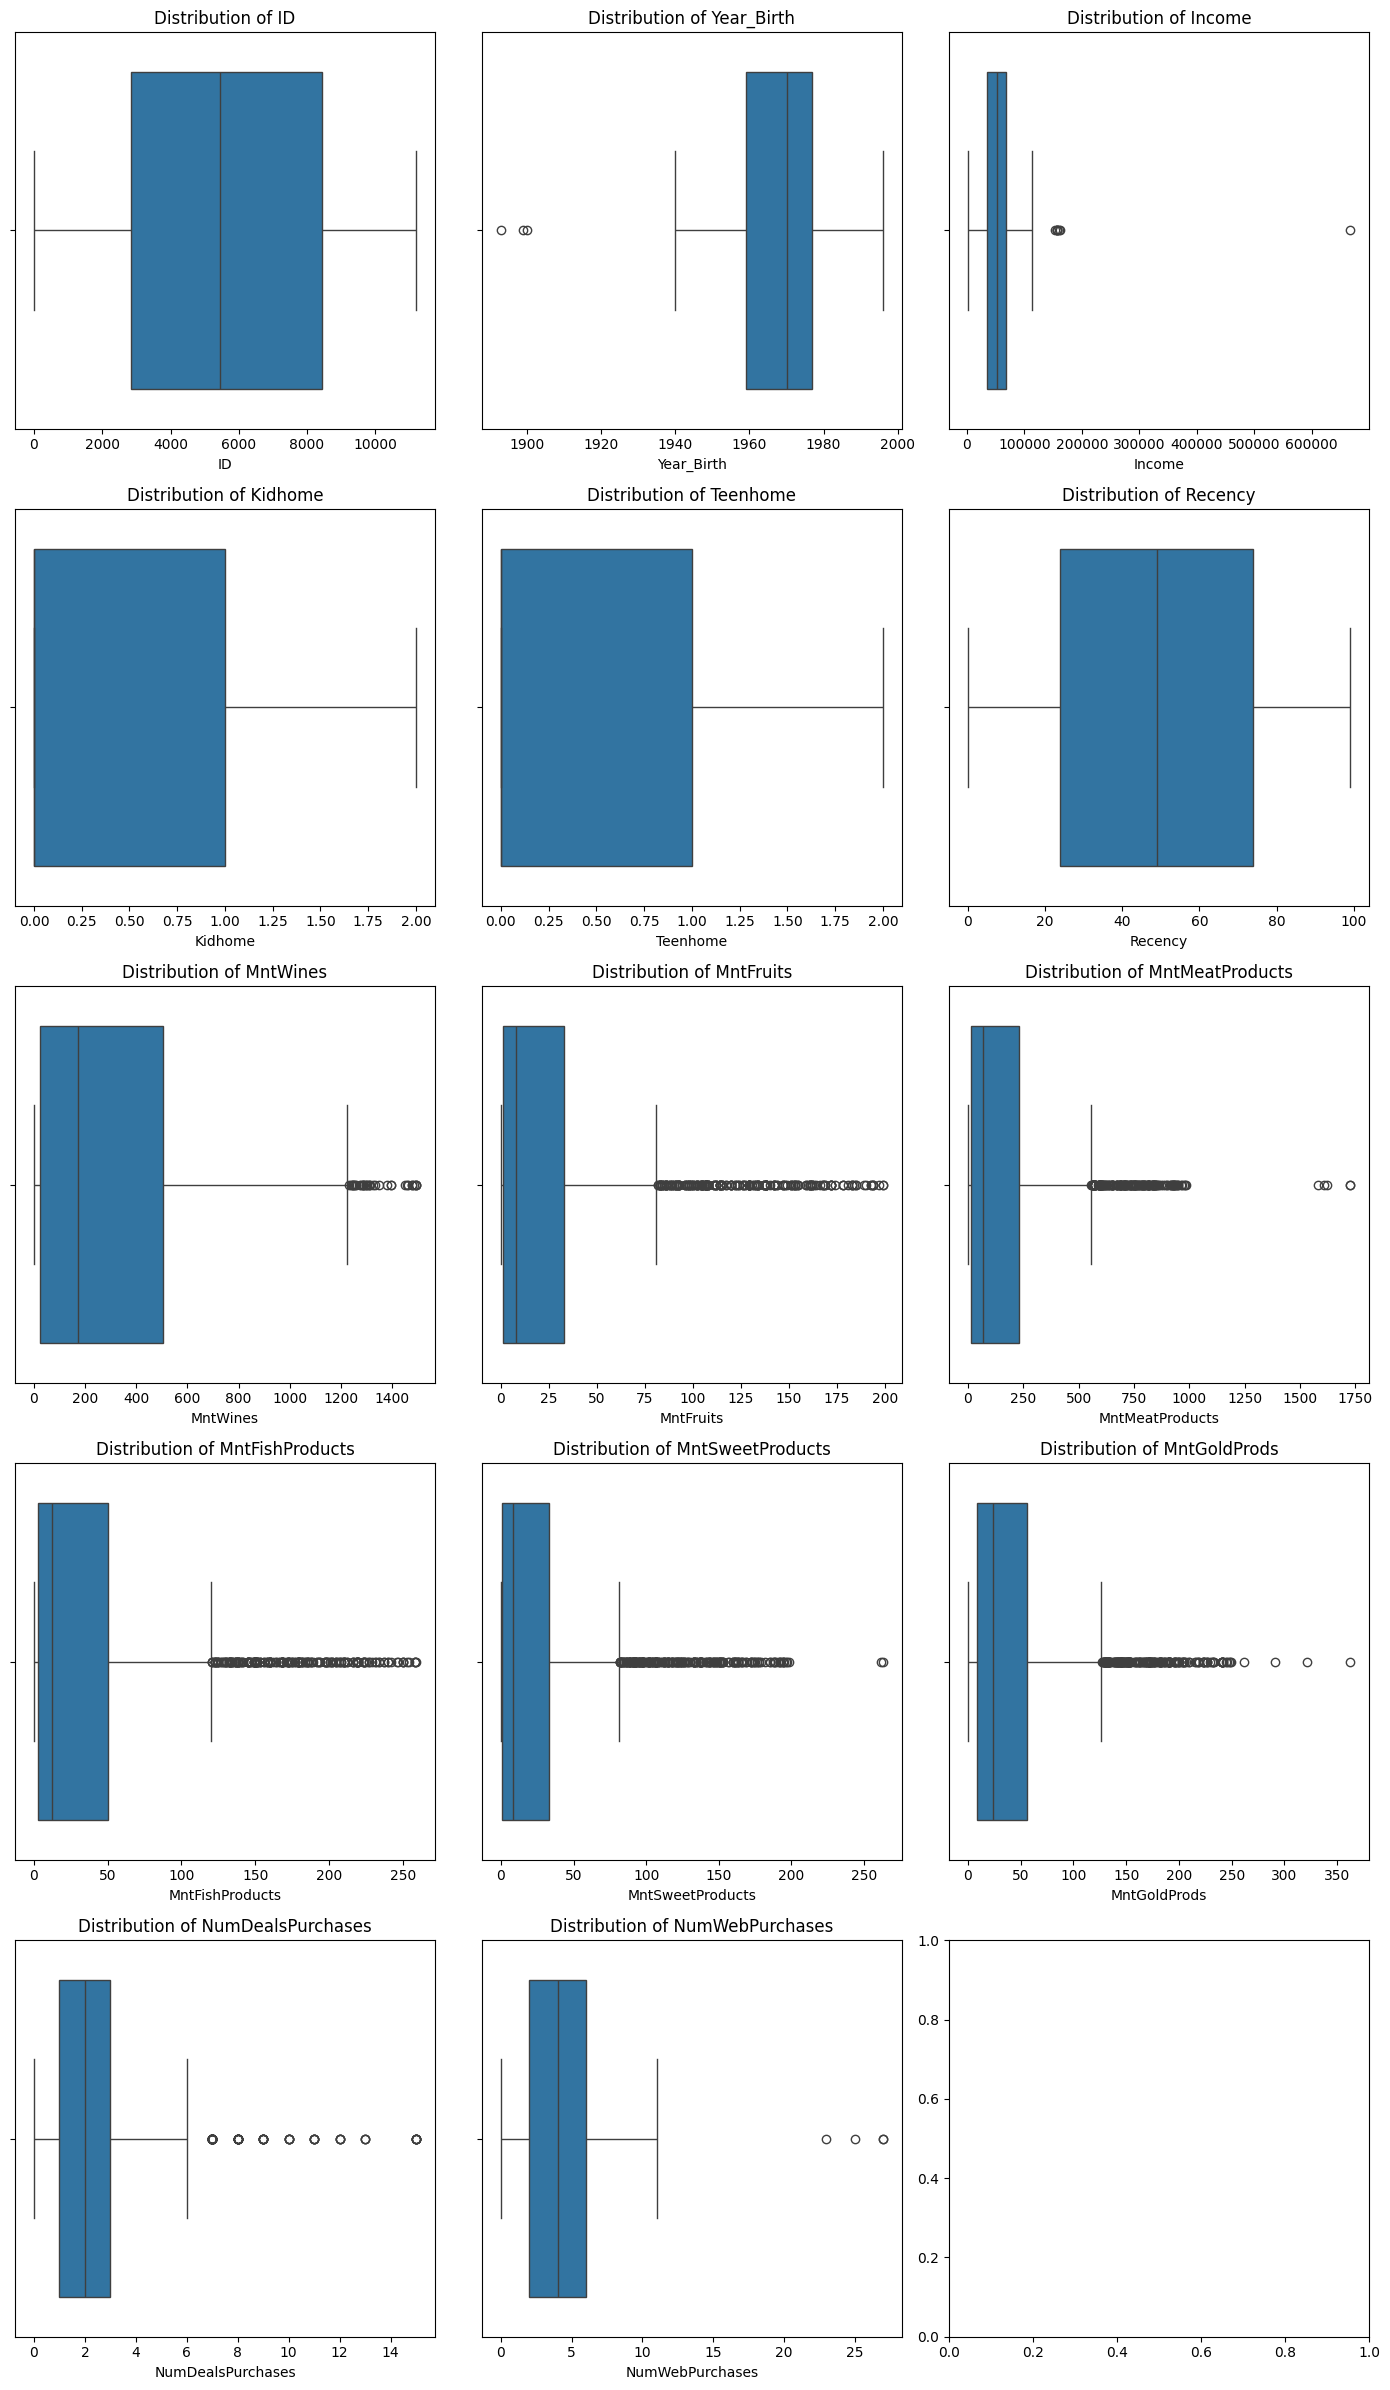

In [29]:
#Cek outlier

numerical_cols = dt.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(14, 24))
axes = axes.flatten()

for i, col in enumerate(numerical_cols[:14]):
    sns.boxplot(data=dt, x=col, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

In [30]:
#mengkonversi tanggal

dt["Dt_Customer"] = pd.to_datetime(dt["Dt_Customer"],dayfirst=True)

In [31]:
#Membuat ringkasan fitur. Membuat fitur Age

dt["Age"] =2025-dt["Year_Birth"]


In [32]:
dt["Age"].value_counts()

,count
Age,
49,89
54,87
50,83
53,79
47,77
55,77
60,74
52,74
56,71


In [33]:
#Membuat fitur mengetahui lama pelanggan menjadi customer

dt["Tenure"] =pd.Timestamp.now().year-dt["Dt_Customer"].dt.year

In [34]:
dt['Tenure'].value_counts()

,count
Tenure,
12,1189
11,557
13,494


In [35]:
#Membuat fitur total pengeluaran dari fitur pengeluaran berbasis jenis product

dt["TotalSpend"] = (dt['MntFruits']+dt["MntWines"]+dt["MntMeatProducts"]+dt["MntFishProducts"]+dt["MntSweetProducts"]+dt["MntGoldProds"])


In [36]:
dt['TotalSpend'].value_counts()

,count
TotalSpend,
46,19
22,18
57,16
44,15
55,15
...,...
1931,1
1822,1
132,1


In [37]:
#Membuat fitur frekuensi dari penjumlahan semua jenis pembelian

dt['Frekuensi']=(dt['NumDealsPurchases']+dt['NumWebPurchases']+dt['NumCatalogPurchases']+dt['NumStorePurchases'])

In [38]:
dt['Frekuensi'].value_counts()

,count
Frekuensi,
7,149
5,145
4,128
6,123
17,116
9,102
19,101
16,101
21,95


In [39]:
#Membuat fitur total promo yang diterima dari 5 fitur acceptedcmp

dt['Promo_Accepted']=(dt['AcceptedCmp1']+dt['AcceptedCmp2']+dt['AcceptedCmp3']+dt['AcceptedCmp4']+dt['AcceptedCmp5'])

In [21]:
dt['Promo_Accepted'].value_counts()

,count
Promo_Accepted,
0,1777
1,325
2,83
3,44
4,11


In [40]:
#fitur yang sudah tidak digunakan setelah membuat fitur baru dihapus

dt=dt.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
           'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
           'Year_Birth','MntFruits', 'MntWines', 'MntSweetProducts', 'MntFishProducts',
           'MntMeatProducts', 'MntGoldProds','Dt_Customer'], axis=1)

In [ ]:
dt=dt.drop('Dt_Customer',axis=1)

In [41]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2240 non-null   int64  
 1   Education          2240 non-null   object 
 2   Marital_Status     2240 non-null   object 
 3   Income             2240 non-null   float64
 4   Kidhome            2240 non-null   int64  
 5   Teenhome           2240 non-null   int64  
 6   Recency            2240 non-null   int64  
 7   NumWebVisitsMonth  2240 non-null   int64  
 8   Complain           2240 non-null   int64  
 9   Z_CostContact      2240 non-null   int64  
 10  Z_Revenue          2240 non-null   int64  
 11  Response           2240 non-null   int64  
 12  Age                2240 non-null   int64  
 13  Tenure             2240 non-null   int32  
 14  TotalSpend         2240 non-null   int64  
 15  Frekuensi          2240 non-null   int64  
 16  Promo_Accepted     2240 

In [42]:
#Mengubah data kategorikan menjadi numerik

dt_encoded= pd.get_dummies(dt, columns=['Education', 'Marital_Status'])


In [43]:
#STANDARISASI

scaler = StandardScaler()
dt_scaled = scaler.fit_transform(dt_encoded)

In [44]:
dt_encoded=pd.DataFrame(dt_scaled, columns=dt_encoded.columns)

In [45]:
dt_encoded.head()

,ID,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,-0.020999,0.235327,-0.825218,-0.929894,0.307039,0.693904,-0.097282,0.0,0.0,2.388846,...,-0.444816,-0.526385,-0.029894,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894
1,-1.053058,-0.235826,1.032559,0.906934,-0.383664,-0.130463,-0.097282,0.0,0.0,-0.418612,...,-0.444816,-0.526385,-0.029894,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894
2,-0.447070,0.773633,-0.825218,-0.929894,-0.798086,-0.542647,-0.097282,0.0,0.0,-0.418612,...,-0.444816,-0.526385,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894
3,0.181716,-1.022732,1.032559,-0.929894,-0.798086,0.281720,-0.097282,0.0,0.0,-0.418612,...,-0.444816,-0.526385,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894
4,-0.082614,0.241519,1.032559,-0.929894,1.550305,-0.130463,-0.097282,0.0,0.0,-0.418612,...,-0.444816,1.899751,-0.029894,-0.036621,-0.339909,1.261980,-0.522233,-0.591099,-0.188676,-0.029894


In [ ]:
# !pip install kneed

## DBSCAN

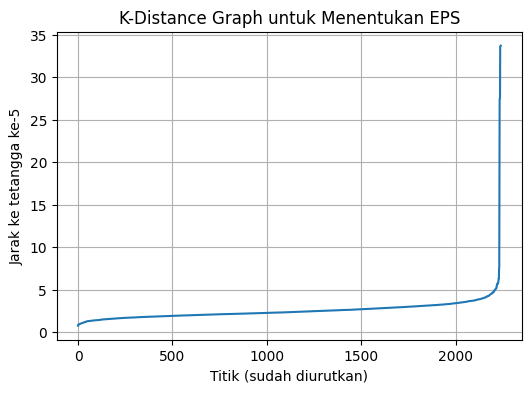

In [58]:
#Mencari eps terbaik untuk dbscan

k=5

neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(dt_encoded)
distances, indices = neighbors_fit.kneighbors(dt_encoded)


k_distances = np.sort(distances[:, k-1])

plt.figure(figsize=(6,4))
plt.plot(k_distances)
plt.xlabel("Titik (sudah diurutkan)")
plt.ylabel(f"Jarak ke tetangga ke-{k}")
plt.title("K-Distance Graph untuk Menentukan EPS")
plt.grid(True)
plt.show()

In [59]:
kneedle = KneeLocator(x=np.arange(len(k_distances)),
                      y=k_distances,S=1.0,
                      curve='convex',
                      direction='increasing')

optimal_epsilon = kneedle.knee_y
print("EPS yang direkomendasikan =", optimal_epsilon)

EPS yang direkomendasikan = 5.77356782670634


In [60]:
#DBSCAN

dbscan = DBSCAN(eps=5.77, min_samples=5)
y_pred = dbscan.fit_predict(dt_encoded)

In [66]:
print("Silhouette (final dbscan):", silhouette_score(dt_encoded, y_pred))

Silhouette (final dbscan): 0.2527060839458219


## K-Means

In [46]:
X = dt_encoded.copy().values
feature_names = dt_encoded.columns.tolist()

print("Shape X:", X.shape)
print("Feature names:", feature_names)

Shape X: (2240, 28)
Feature names: ['ID', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'NumWebVisitsMonth', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Tenure', 'TotalSpend', 'Frekuensi', 'Promo_Accepted', 'Education_2n Cycle', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Status_Absurd', 'Marital_Status_Alone', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow', 'Marital_Status_YOLO']


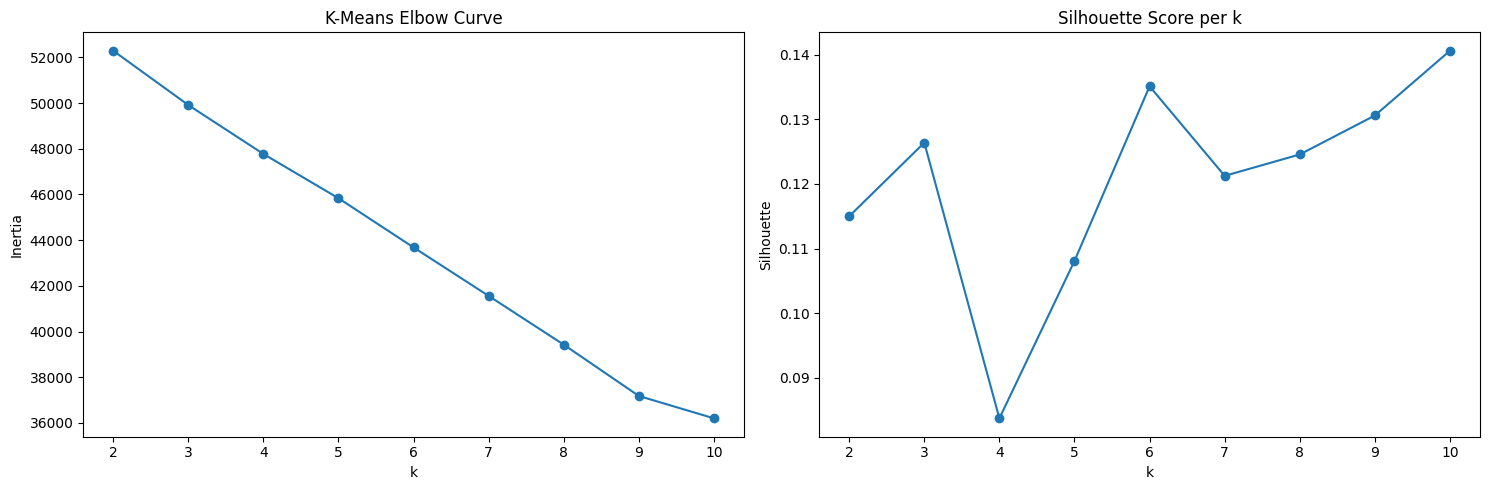

k optimal berdasarkan Silhouette: 10


In [47]:
ks = list(range(2, 11))
inertias = []
silhouette_scores = []

for k in ks:
    km = KMeans(
        n_clusters=k,
        n_init=20,
        random_state=42,
    )
    labels = km.fit_predict(X)
    inertias.append(km.inertia_)

    try:
        sil = silhouette_score(X, labels)
    except:
        sil = np.nan
    silhouette_scores.append(sil)

# Visualisasi Elbow dan Silhouette
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(ks, inertias, marker='o')
ax[0].set_title("K-Means Elbow Curve")
ax[0].set_xlabel("k")
ax[0].set_ylabel("Inertia")

ax[1].plot(ks, silhouette_scores, marker='o')
ax[1].set_title("Silhouette Score per k")
ax[1].set_xlabel("k")
ax[1].set_ylabel("Silhouette")

plt.tight_layout()
plt.show()

best_k = ks[int(np.nanargmax(silhouette_scores))]
print("k optimal berdasarkan Silhouette:", best_k)

In [48]:
def objective(trial):
    n_clusters = trial.suggest_int("n_clusters", 9, 9)
    init_method = trial.suggest_categorical("init", ["k-means++", "random"])
    n_init_val = trial.suggest_int("n_init", 10, 100)

    km = KMeans(
        n_clusters=n_clusters,
        init=init_method,
        n_init=n_init_val,
        random_state=42,
        algorithm="elkan"
    )

    labels = km.fit_predict(X)

    # Silhouette score, minus jika gagal
    try:
        sil = silhouette_score(X, labels)
    except:
        sil = -1.0
    return sil

In [49]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=40)  # bisa ditambah 50–100 trial

print("Best params:", study.best_params)
print("Best silhouette:", study.best_value)

[I 2025-11-17 23:52:24,865] A new study created in memory with name: no-name-aa7fbe60-581e-4ff3-8562-b38340373cd4
[I 2025-11-17 23:52:26,219] Trial 0 finished with value: 0.13059392629505637 and parameters: {'n_clusters': 9, 'init': 'k-means++', 'n_init': 70}. Best is trial 0 with value: 0.13059392629505637.
[I 2025-11-17 23:52:26,851] Trial 1 finished with value: 0.13059392629505637 and parameters: {'n_clusters': 9, 'init': 'k-means++', 'n_init': 31}. Best is trial 0 with value: 0.13059392629505637.
[I 2025-11-17 23:52:27,627] Trial 2 finished with value: 0.13059392629505637 and parameters: {'n_clusters': 9, 'init': 'k-means++', 'n_init': 40}. Best is trial 0 with value: 0.13059392629505637.
[I 2025-11-17 23:52:28,734] Trial 3 finished with value: 0.13059392629505637 and parameters: {'n_clusters': 9, 'init': 'k-means++', 'n_init': 64}. Best is trial 0 with value: 0.13059392629505637.
[I 2025-11-17 23:52:30,021] Trial 4 finished with value: 0.11279556985196755 and parameters: {'n_clust

Best params: {'n_clusters': 9, 'init': 'k-means++', 'n_init': 70}
Best silhouette: 0.13059392629505637


In [50]:
best_params = study.best_params
km_best = KMeans(
    n_clusters=best_params["n_clusters"],
    init=best_params["init"],
    n_init=best_params["n_init"],
    random_state=42,
    algorithm="elkan"
)

labels_kmeans = km_best.fit_predict(X)
print("Silhouette (optimized):", silhouette_score(X, labels_kmeans))

Silhouette (optimized): 0.13059392629505637


## GMM

In [51]:
components = list(range(2, 11))
cov_types = ["full", "tied", "diag", "spherical"]

results = []

for cv in cov_types:
    for n in components:
        gmm = GaussianMixture(
            n_components=n,
            covariance_type=cv,
            random_state=42
        )
        gmm.fit(X)
        bic = gmm.bic(X)
        aic = gmm.aic(X)
        results.append((cv, n, bic, aic))

# Hasil sebagai DataFrame
gmm_df = pd.DataFrame(results, columns=["covariance", "n_components", "BIC", "AIC"])
gmm_df_sorted = gmm_df.sort_values("BIC", ascending=True)
gmm_df_sorted.head(10)

,covariance,n_components,BIC,AIC
8,full,10,-231653.851643,-256505.042892
5,full,7,-211144.240875,-228538.360480
26,diag,10,-207031.817683,-210283.215204
7,full,9,-204952.488989,-227317.989690
4,full,6,-204662.956711,-219571.385768
6,full,8,-194752.972679,-214632.782832
3,full,5,-189218.165847,-201640.904356
25,diag,9,-187403.212374,-190328.898720
23,diag,7,-182985.961376,-185260.225371
22,diag,6,-166097.700214,-168046.253035


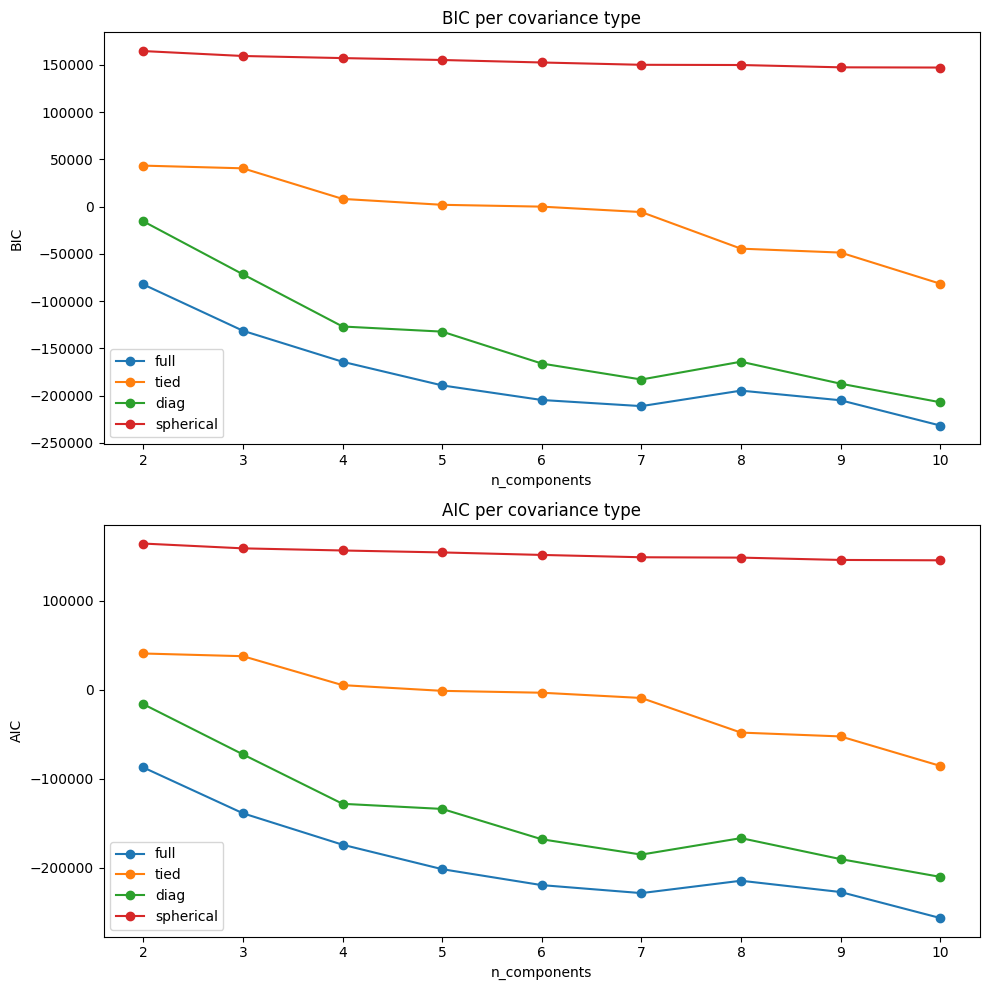

In [52]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

for cv in cov_types:
    subset = gmm_df[gmm_df["covariance"] == cv]
    ax[0].plot(subset["n_components"], subset["BIC"], marker='o', label=cv)
    ax[1].plot(subset["n_components"], subset["AIC"], marker='o', label=cv)

ax[0].set_title("BIC per covariance type")
ax[0].set_xlabel("n_components")
ax[0].set_ylabel("BIC")
ax[0].legend()

ax[1].set_title("AIC per covariance type")
ax[1].set_xlabel("n_components")
ax[1].set_ylabel("AIC")
ax[1].legend()

plt.tight_layout()
plt.show()

In [53]:
best_row = gmm_df_sorted.iloc[0]
best_cv = best_row["covariance"]
best_n = best_row["n_components"]

print("Best covariance:", best_cv)
print("Best components:", best_n)

gmm_final = GaussianMixture(
    n_components=best_n,
    covariance_type=best_cv,
    random_state=42
)

labels_gmm = gmm_final.fit_predict(X)

print("Silhouette (final GMM):", silhouette_score(X, labels_gmm))

Best covariance: full
Best components: 10
Silhouette (final GMM): 0.1397369466483639


## Spectral

In [61]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np

# PCA (opsional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(dt_encoded)

affinities = ["nearest_neighbors", "rbf"]
clusters_to_try = [5, 4, 3, 2]

best_score = -1
best_affinity = None
best_k = None

for aff in affinities:
    print(f"\n=== Affinity: {aff} ===")
    for k in clusters_to_try:
        sc = SpectralClustering(n_clusters=k, affinity=aff, random_state=42)
        labels = sc.fit_predict(X_pca)

        sil = silhouette_score(X_pca, labels)
        print(f"n_clusters={k}  ->  silhouette={sil:.4f}")

        # Simpan yang terbaik
        if sil > best_score:
            best_score = sil
            best_affinity = aff
            best_k = k

print("\n=== HASIL TERBAIK ===")
print("Affinity terbaik :", best_affinity)
print("n_clusters terbaik :", best_k)
print("Silhouette score :", best_score)


=== Affinity: nearest_neighbors ===
n_clusters=5  ->  silhouette=0.3426
n_clusters=4  ->  silhouette=0.3601
n_clusters=3  ->  silhouette=0.3801
n_clusters=2  ->  silhouette=0.4410

=== Affinity: rbf ===
n_clusters=5  ->  silhouette=0.2866
n_clusters=4  ->  silhouette=0.3219
n_clusters=3  ->  silhouette=0.3918
n_clusters=2  ->  silhouette=0.4445

=== HASIL TERBAIK ===
Affinity terbaik : rbf
n_clusters terbaik : 2
Silhouette score : 0.44449267183200913


In [55]:
spectral_clustering = SpectralClustering(n_clusters=best_k, affinity=best_affinity, random_state=42)
labels_spectral = spectral_clustering.fit_predict(X_pca)

## Visualisasi

In [62]:
#Visualisasi

pca = PCA(n_components=2)
pca_hasil = pca.fit_transform(dt_encoded)

pca_df = pd.DataFrame(pca_hasil, columns=['PCA_1', 'PCA_2'])

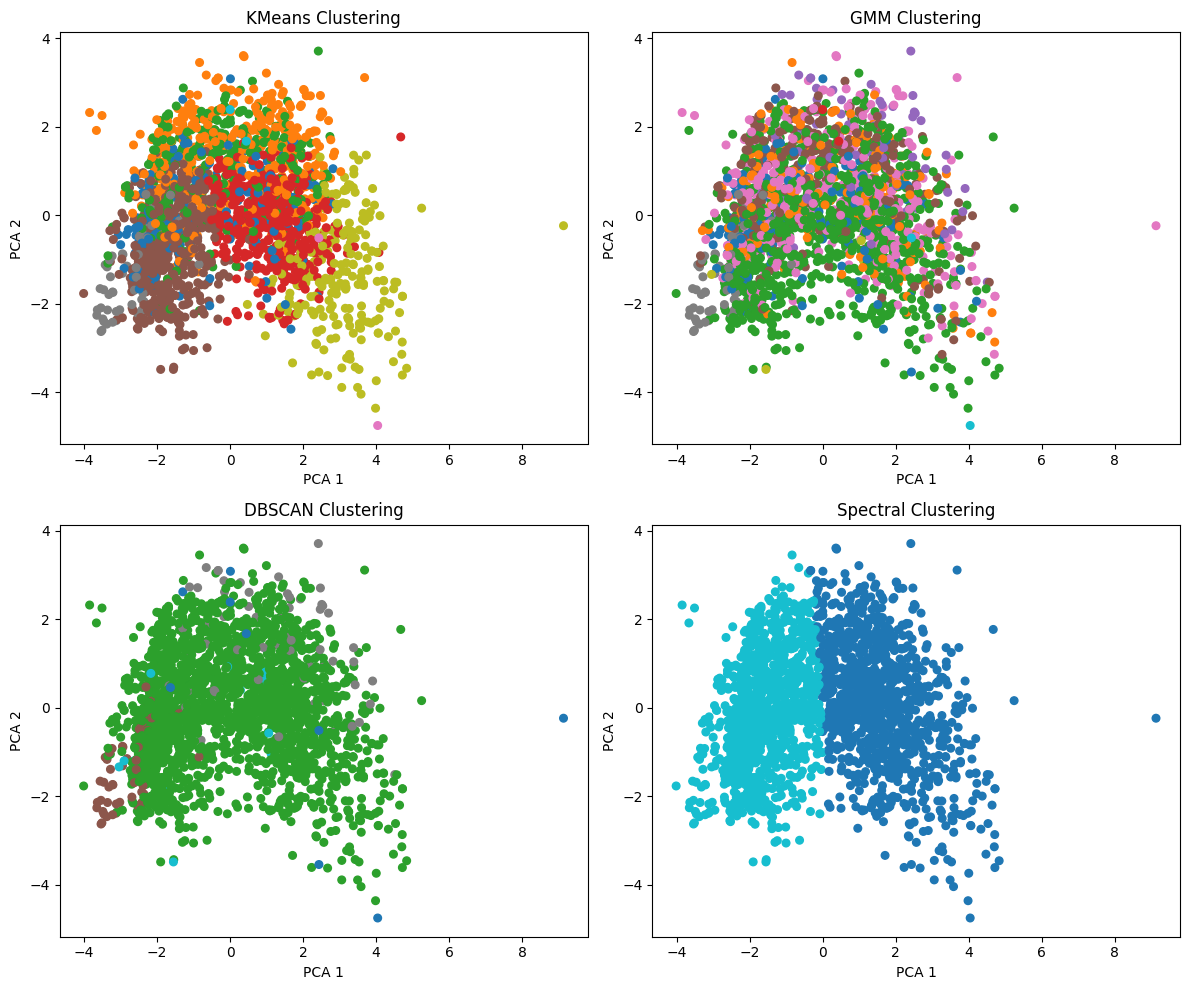

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0,0].scatter(pca_df['PCA_1'], pca_df['PCA_2'], c=labels_kmeans, cmap='tab10', s=30)
axes[0,0].set_title("KMeans Clustering")
axes[0,0].set_xlabel("PCA 1")
axes[0,0].set_ylabel("PCA 2")

axes[0,1].scatter(pca_df['PCA_1'], pca_df['PCA_2'], c=labels_gmm, cmap='tab10', s=30)
axes[0,1].set_title("GMM Clustering")
axes[0,1].set_xlabel("PCA 1")
axes[0,1].set_ylabel("PCA 2")

axes[1,0].scatter(pca_df['PCA_1'], pca_df['PCA_2'], c=y_pred, cmap='tab10', s=30)
axes[1,0].set_title("DBSCAN Clustering")
axes[1,0].set_xlabel("PCA 1")
axes[1,0].set_ylabel("PCA 2")

axes[1,1].scatter(pca_df['PCA_1'], pca_df['PCA_2'], c=labels_spectral, cmap='tab10', s=30)
axes[1,1].set_title("Spectral Clustering")
axes[1,1].set_xlabel("PCA 1")
axes[1,1].set_ylabel("PCA 2")

plt.tight_layout()
plt.show()


In [64]:
cluster_algos = {
    "KMeans": labels_kmeans,
    "GMM": labels_gmm,
    "DBSCAN": y_pred,  # pastikan ini label DBSCAN
    "Spectral": labels_spectral
}

profile_cols = ["Recency","Frekuensi","Promo_Accepted","TotalSpend"]

for algo_name, labels in cluster_algos.items():
    print(f"\n=== {algo_name} ===")

    # Hitung jumlah cluster (abaikan -1 untuk DBSCAN)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"Jumlah Cluster: {n_clusters}")

    # Hitung noise / pseudo-noise
    if algo_name == "DBSCAN":
        pseudo_noise = (labels == -1)
    elif algo_name == "KMeans":
        distances = cdist(X, km_best.cluster_centers_, 'euclidean')
        min_dist = distances.min(axis=1)
        threshold = np.percentile(min_dist, 95)  # 95th percentile
        pseudo_noise = min_dist > threshold
    elif algo_name == "GMM":
        log_probs = gmm_final.score_samples(X)
        threshold = np.percentile(log_probs, 5)  # 5th percentile
        pseudo_noise = log_probs < threshold

    n_noise = pseudo_noise.sum()
    print(f"Jumlah Noise: {n_noise}")

    # Buat kolom sementara di dataframe
    dt_temp = dt_encoded.copy()
    dt_temp["Cluster"] = labels
    dt_temp[f"Noise_{algo_name}"] = pseudo_noise.astype(int)

    # Tampilkan distribusi noise
    print("Distribusi Noise:")
    print(dt_temp[f"Noise_{algo_name}"].value_counts())

    # Contoh 5 data noise pertama
    print("\nContoh data noise (standardized):")
    display(dt_temp[dt_temp[f"Noise_{algo_name}"] == 1].head())

    # Profil cluster: mean fitur penting (hanya titik non-noise)
    print("\nCluster profiling (mean of key features, non-noise):")
    display(dt_temp[dt_temp[f"Noise_{algo_name}"]==0].groupby("Cluster")[profile_cols].mean())


=== KMeans ===
Jumlah Cluster: 9
Jumlah Noise: 112
Distribusi Noise:
Noise_KMeans
0    2128
1     112
Name: count, dtype: int64

Contoh data noise (standardized):


,ID,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,...,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Cluster,Noise_KMeans
9,0.094531,-1.861572,1.032559,0.906934,0.652391,6.052291,-0.097282,0.0,0.0,-0.418612,...,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,1,1
38,0.925107,-0.392225,-0.825218,0.906934,1.722981,-0.130463,-0.097282,0.0,0.0,-0.418612,...,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,-0.591099,5.300086,-0.029894,4,1
50,0.930961,0.528869,-0.825218,0.906934,-0.694481,-1.367014,-0.097282,0.0,0.0,-0.418612,...,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,-0.591099,5.300086,-0.029894,3,1
63,0.285230,0.616516,-0.825218,0.906934,-1.419719,-0.130463,-0.097282,0.0,0.0,-0.418612,...,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,-0.591099,5.300086,-0.029894,1,1
78,1.481495,-1.035516,-0.825218,-0.929894,-1.281579,-0.954831,10.279429,0.0,0.0,-0.418612,...,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,0,1



Cluster profiling (mean of key features, non-noise):


,Recency,Frekuensi,Promo_Accepted,TotalSpend
Cluster,,,,
0,-0.012036,-0.204362,-0.214668,-0.264510
1,-0.010313,0.018972,-0.197699,-0.108637
2,-0.023217,-0.087321,-0.239665,-0.231484
3,0.105940,0.701901,-0.096366,0.553255
4,0.026528,-0.789640,-0.332452,-0.800817
5,0.134363,0.604257,1.035390,0.974402
6,-0.041570,-1.021852,-0.272121,-0.870902
7,-0.204441,0.784865,1.957781,1.633599
8,-1.592395,0.539114,-0.439037,-0.301933



=== GMM ===
Jumlah Cluster: 10
Jumlah Noise: 112
Distribusi Noise:
Noise_GMM
0    2128
1     112
Name: count, dtype: int64

Contoh data noise (standardized):


,ID,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,...,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Cluster,Noise_GMM
9,0.094531,-1.861572,1.032559,0.906934,0.652391,6.052291,-0.097282,0.0,0.0,-0.418612,...,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,6,1
21,-0.066594,-1.989447,1.032559,-0.929894,-0.245523,-1.779198,-0.097282,0.0,0.0,-0.418612,...,-0.029894,-0.036621,-0.339909,1.261980,-0.522233,-0.591099,-0.188676,-0.029894,2,1
30,0.391825,-1.648606,-0.825218,-0.929894,-0.521805,-0.130463,-0.097282,0.0,0.0,-0.418612,...,-0.029894,-0.036621,2.941967,-0.792406,-0.522233,-0.591099,-0.188676,-0.029894,1,1
46,1.329921,-1.787587,-0.825218,-0.929894,-0.867157,1.518271,-0.097282,0.0,0.0,2.388846,...,-0.029894,-0.036621,-0.339909,1.261980,-0.522233,-0.591099,-0.188676,-0.029894,0,1
67,1.163559,1.436020,-0.825218,0.906934,-1.039832,-0.130463,-0.097282,0.0,0.0,2.388846,...,-0.029894,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894,0,1



Cluster profiling (mean of key features, non-noise):


,Recency,Frekuensi,Promo_Accepted,TotalSpend
Cluster,,,,
0,0.059054,-0.245961,-0.239276,-0.325238
1,0.060888,0.011325,-0.205837,-0.102135
2,0.009625,0.027376,0.019022,0.035650
3,-1.592395,0.539114,-0.439037,-0.301933
4,-0.011502,0.256257,0.104173,0.234838
5,-0.024909,-0.031226,-0.140027,-0.109255
6,0.026025,0.053354,0.028738,0.090419
7,-0.007301,-1.074829,-0.288585,-0.893385
8,0.355964,-0.296884,-0.193299,-0.478256



=== DBSCAN ===
Jumlah Cluster: 4
Jumlah Noise: 12
Distribusi Noise:
Noise_DBSCAN
0    2228
1      12
Name: count, dtype: int64

Contoh data noise (standardized):


,ID,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,...,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Cluster,Noise_DBSCAN
131,-1.589421,0.362882,1.032559,0.906934,-0.245523,1.106087,-0.097282,0.0,0.0,-0.418612,...,-0.029894,27.306898,-0.339909,-0.792406,-0.522233,-0.591099,-0.188676,-0.029894,-1,1
138,0.637055,-0.654647,1.032559,0.906934,-0.418199,-0.130463,-0.097282,0.0,0.0,2.388846,...,-0.029894,27.306898,-0.339909,-0.792406,-0.522233,-0.591099,-0.188676,-0.029894,-1,1
153,-1.694475,-0.721920,1.032559,-0.929894,-1.281579,0.281720,-0.097282,0.0,0.0,-0.418612,...,-0.029894,27.306898,-0.339909,-0.792406,-0.522233,-0.591099,-0.188676,-0.029894,-1,1
192,0.689120,-0.623487,1.032559,-0.929894,1.722981,-0.130463,10.279429,0.0,0.0,-0.418612,...,-0.029894,-0.036621,2.941967,-0.792406,-0.522233,-0.591099,-0.188676,-0.029894,-1,1
239,1.667266,0.316982,-0.825218,0.906934,-0.901692,-0.542647,-0.097282,0.0,0.0,-0.418612,...,-0.029894,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894,-1,1



Cluster profiling (mean of key features, non-noise):


,Recency,Frekuensi,Promo_Accepted,TotalSpend
Cluster,,,,
0,0.002847,0.019413,0.005418,0.018949
1,-0.041570,-1.021852,-0.272121,-0.870902
2,-0.011502,0.256257,0.104173,0.234838
3,0.047117,-0.263170,-0.361436,-0.440130



=== Spectral ===
Jumlah Cluster: 2
Jumlah Noise: 12
Distribusi Noise:
Noise_Spectral
0    2228
1      12
Name: count, dtype: int64

Contoh data noise (standardized):


,ID,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,...,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Cluster,Noise_Spectral
131,-1.589421,0.362882,1.032559,0.906934,-0.245523,1.106087,-0.097282,0.0,0.0,-0.418612,...,-0.029894,27.306898,-0.339909,-0.792406,-0.522233,-0.591099,-0.188676,-0.029894,1,1
138,0.637055,-0.654647,1.032559,0.906934,-0.418199,-0.130463,-0.097282,0.0,0.0,2.388846,...,-0.029894,27.306898,-0.339909,-0.792406,-0.522233,-0.591099,-0.188676,-0.029894,1,1
153,-1.694475,-0.721920,1.032559,-0.929894,-1.281579,0.281720,-0.097282,0.0,0.0,-0.418612,...,-0.029894,27.306898,-0.339909,-0.792406,-0.522233,-0.591099,-0.188676,-0.029894,1,1
192,0.689120,-0.623487,1.032559,-0.929894,1.722981,-0.130463,10.279429,0.0,0.0,-0.418612,...,-0.029894,-0.036621,2.941967,-0.792406,-0.522233,-0.591099,-0.188676,-0.029894,1,1
239,1.667266,0.316982,-0.825218,0.906934,-0.901692,-0.542647,-0.097282,0.0,0.0,-0.418612,...,-0.029894,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894,0,1



Cluster profiling (mean of key features, non-noise):


,Recency,Frekuensi,Promo_Accepted,TotalSpend
Cluster,,,,
0,0.007808,0.779376,0.325730,0.810972
1,-0.004266,-0.755331,-0.317798,-0.784169
